# Наші завдання на модуль 5

1. Реалізація one-hot encoding в Python.
2. Реалізація label-encoding в Python.
3. Реалізація таргетного кодування категоріальних змінних в Python.
4. Створення бінарних змінних з текстових змінних.
5. Трансформація змінних часу і дати.
6. Імпутація пропусків в Python.
7. Усунення лінійного зв'язку.
8. Боротьба з мультиколінеарністю.
9. Формування вибірки.
10. Забeзпечення відтворюваності рандомного.

Задачі 1-8 стосуються етапів підготовки даних до аналізу, розробки нових змінних.
Задачі 9-10 та приклад моделі після них стосуються теж етапів розробки моделі, а також частково оптимізації моделі (в частині підбору гіперпараметрів).

In [3]:
import pandas as pd
import numpy as np

corona = pd.read_csv("flat_2.csv", sep = ";",  decimal=",")

In [4]:
corona.head()

,Cart_Number,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_abs,Value_m,Balcon_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Create
0,10083994,1,Типовая,2,Новосибирск,1,Первомайский,8,Одоевского,1143,1/11,Речной вокзал,291,16760,Студия,23,4,18,Монолит,3,22.0,12.0,0.0,1340000,60909.091,0,Отличное,6,Совмещенный,8,54.9371,83.1011,2014-04-21 11:24:39.767
1,10015724,1,Улучшенной планировки,3,Новосибирск,1,Дзержинский,1,Адриена Лежена,964,23,Золотая Нива,284,683,Изолированная,3,8,14,Кирпич,2,42.7,22.0,11.8,3250000,76112.412,0,Хорошее,2,Совмещенный,8,55.0434,82.9822,2014-12-19 17:41:03.790
2,10014604,1,Типовая,2,Новосибирск,1,Дзержинский,1,Бориса Богаткова,349,243,Золотая Нива,284,366,NaN,0,6,9,Панель,1,29.9,17.2,5.6,2150000,71906.355,0,Удовлетворительное,7,Совмещенный,8,55.0405,82.9801,2013-04-26 09:48:05.307
3,20094604,2,Типовая,2,Новосибирск,1,Советский,9,Лесосечная,980,4,Речной вокзал,291,21770,Изолированная,3,3,9,Панель,1,46.3,28.5,7.1,2300000,49676.026,1,NaN,0,Раздельный,9,54.8902,83.0805,2017-07-26 12:16:17.380
4,30075897,3,Улучшенной планировки,3,Новосибирск,1,Октябрьский,7,Гаранина,495,25/2,Золотая Нива,284,1150,Изолированная,3,2,10,Панель,1,66.0,42.0,9.0,2950000,44696.970,0,Хорошее,2,Раздельный,9,55.0288,82.9703,2016-06-06 15:35:46.470


In [5]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cart_Number     34856 non-null  int64  
 1   Rooms_Number    34856 non-null  int64  
 2   Object_Type     34856 non-null  object 
 3   Object_Type_ID  34856 non-null  int64  
 4   Settlement      34856 non-null  object 
 5   Settlement_ID   34856 non-null  int64  
 6   District        34856 non-null  object 
 7   District_Id     34856 non-null  int64  
 8   Street          34856 non-null  object 
 9   Street_Id       34856 non-null  int64  
 10  House_Number    34839 non-null  object 
 11  Metro           32952 non-null  object 
 12  Metro_ID        34856 non-null  int64  
 13  Metro_m         34856 non-null  int64  
 14  Flats_Plan      26866 non-null  object 
 15  Flats_Plan_ID   34856 non-null  int64  
 16  Stor            34856 non-null  int64  
 17  Storeys         34856 non-null 

In [6]:
pd.to_numeric("788+",  errors="coerce")

nan

Деякі змінні числового типу зчиталися як строки через роздільник кому, а не крапку, тому заміняємо коми на крапки в таких змінних і перетворюємо їх у числову змінну.

In [7]:
#flat['Value_m'] = pd.to_numeric(flat.Value_m.replace({',':'.'}, regex=True), errors='coerce')
#flat['Long'] = pd.to_numeric(flat.Long.replace({',':'.'}, regex=True), errors='coerce')
#flat['lat'] = pd.to_numeric(flat.lat.replace({',':'.'}, regex=True), errors='coerce')
#flat['Space_Total'] = pd.to_numeric(flat.Space_Total.replace({',':'.'}, regex=True), errors='coerce')
#flat['Space_Living'] = pd.to_numeric(flat.Space_Living.replace({',':'.'}, regex=True), errors='coerce')
#flat['Space_Kitchen'] = pd.to_numeric(flat.Space_Kitchen.replace({',':'.'}, regex=True), errors='coerce')

Дивимося на перші 5 рядків датасету.

In [8]:
corona.head(5)

,Cart_Number,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_abs,Value_m,Balcon_Num,Sost,Sost_ID,Clozet,Clozet_ID,lat,Long,Date_Create
0,10083994,1,Типовая,2,Новосибирск,1,Первомайский,8,Одоевского,1143,1/11,Речной вокзал,291,16760,Студия,23,4,18,Монолит,3,22.0,12.0,0.0,1340000,60909.091,0,Отличное,6,Совмещенный,8,54.9371,83.1011,2014-04-21 11:24:39.767
1,10015724,1,Улучшенной планировки,3,Новосибирск,1,Дзержинский,1,Адриена Лежена,964,23,Золотая Нива,284,683,Изолированная,3,8,14,Кирпич,2,42.7,22.0,11.8,3250000,76112.412,0,Хорошее,2,Совмещенный,8,55.0434,82.9822,2014-12-19 17:41:03.790
2,10014604,1,Типовая,2,Новосибирск,1,Дзержинский,1,Бориса Богаткова,349,243,Золотая Нива,284,366,NaN,0,6,9,Панель,1,29.9,17.2,5.6,2150000,71906.355,0,Удовлетворительное,7,Совмещенный,8,55.0405,82.9801,2013-04-26 09:48:05.307
3,20094604,2,Типовая,2,Новосибирск,1,Советский,9,Лесосечная,980,4,Речной вокзал,291,21770,Изолированная,3,3,9,Панель,1,46.3,28.5,7.1,2300000,49676.026,1,NaN,0,Раздельный,9,54.8902,83.0805,2017-07-26 12:16:17.380
4,30075897,3,Улучшенной планировки,3,Новосибирск,1,Октябрьский,7,Гаранина,495,25/2,Золотая Нива,284,1150,Изолированная,3,2,10,Панель,1,66.0,42.0,9.0,2950000,44696.970,0,Хорошее,2,Раздельный,9,55.0288,82.9703,2016-06-06 15:35:46.470


Виводимо інформацію про змінні.

In [9]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cart_Number     34856 non-null  int64  
 1   Rooms_Number    34856 non-null  int64  
 2   Object_Type     34856 non-null  object 
 3   Object_Type_ID  34856 non-null  int64  
 4   Settlement      34856 non-null  object 
 5   Settlement_ID   34856 non-null  int64  
 6   District        34856 non-null  object 
 7   District_Id     34856 non-null  int64  
 8   Street          34856 non-null  object 
 9   Street_Id       34856 non-null  int64  
 10  House_Number    34839 non-null  object 
 11  Metro           32952 non-null  object 
 12  Metro_ID        34856 non-null  int64  
 13  Metro_m         34856 non-null  int64  
 14  Flats_Plan      26866 non-null  object 
 15  Flats_Plan_ID   34856 non-null  int64  
 16  Stor            34856 non-null  int64  
 17  Storeys         34856 non-null 

# Кодування категорій

In [10]:
corona.select_dtypes(include=['object'])

,Object_Type,Settlement,District,Street,House_Number,Metro,Flats_Plan,Wall,Sost,Clozet,Date_Create
0,Типовая,Новосибирск,Первомайский,Одоевского,1/11,Речной вокзал,Студия,Монолит,Отличное,Совмещенный,2014-04-21 11:24:39.767
1,Улучшенной планировки,Новосибирск,Дзержинский,Адриена Лежена,23,Золотая Нива,Изолированная,Кирпич,Хорошее,Совмещенный,2014-12-19 17:41:03.790
2,Типовая,Новосибирск,Дзержинский,Бориса Богаткова,243,Золотая Нива,NaN,Панель,Удовлетворительное,Совмещенный,2013-04-26 09:48:05.307
3,Типовая,Новосибирск,Советский,Лесосечная,4,Речной вокзал,Изолированная,Панель,NaN,Раздельный,2017-07-26 12:16:17.380
4,Улучшенной планировки,Новосибирск,Октябрьский,Гаранина,25/2,Золотая Нива,Изолированная,Панель,Хорошее,Раздельный,2016-06-06 15:35:46.470
...,...,...,...,...,...,...,...,...,...,...,...
34851,Улучшенной планировки,Новосибирск,Октябрьский,Выборная,158,Октябрьская,Изолированная,Панель,Отличное,Совмещенный,2017-05-30 09:19:57.087
34852,Типовая,Новосибирск,Железнодорожный,Красноярская,36,Площадь Гарина-Михайловского,смежно-изолированная,Панель,Хорошее,Раздельный,2014-11-01 18:40:29.930
34853,Типовая,Новосибирск,Железнодорожный,Челюскинцев,15,Площадь Гарина-Михайловского,Изолированная,Панель,Хорошее,Раздельный,2014-07-03 15:14:49.163
34854,Улучшенной планировки,Новосибирск,Ленинский,Райсовета площадь,8,Площадь Маркса,Изолированная,Монолит,Отделка под ключ,Раздельный,2017-04-26 11:56:53.003


In [11]:
corona.select_dtypes(include=['object']).apply(set)

Object_Type     {Прочее, Овощехранилище, Парковка, Квартиры, 1...
Settlement      {Каргат, Витаминка, Мошково, Степной, Керамком...
District        {Новосибирский, Искитимский, Тогучинский, Сузу...
Street          {Заельцовский Бор Жилой 1-й пос, Почтовая, Кау...
House_Number    {nan, 253/3, 50б, 50/1, 43, 98/1, 129/1, 172, ...
Metro           {nan, Площадь Ленина, Студенческая, Площадь Ма...
Flats_Plan      {nan, 2/1, смежно-изолированная, 1/2, Свободна...
Wall            {nan, Дерево, Шлакоблок, Газопенобетон, Каркас...
Sost            {nan, Удовлетворительное, Евро-ремонт, Отделка...
Clozet          {nan, Без ванны, В доме, На этаже, Совмещенный...
Date_Create     {2016-05-20 13:11:49.360, 2015-03-25 10:16:35....
dtype: object

## Реалізація one-hot encoding в Python.

Сложний прєкол :)

Персонаж із серіалу Містер Робот постійно говорив іншому герою, що треба визначитись, чи ти нуль, чи ти одиниця. Саме в цьому суть даммі чи ван-хот енкодінгу - перетворити всі альтернативи змінної типу строки в набір змінних з нулями і одиницями.

Ця стратегія хороша, однак обтяжує масив великою кількістю змінних, багато з яких можуть бути не значимими.

![](null.jpg)

Реалізація кодування в пандасі:

In [12]:
pd.get_dummies(corona).shape

(34856, 36012)

In [13]:
def n_unique(x):
  return len(set(x))

corona.select_dtypes(include=['object']).apply(n_unique)

Object_Type        26
Settlement         85
District           24
Street            666
House_Number     1096
Metro              16
Flats_Plan         18
Wall                9
Sost                8
Clozet             12
Date_Create     34036
dtype: int64

In [14]:
corona.groupby(['Sost']).size()

Sost
Евро-ремонт            1453
Отделка под ключ        541
Отличное               7948
Самоотделка            2757
Требует ремонта        1856
Удовлетворительное     3571
Хорошее               14737
dtype: int64

In [15]:
corona = pd.get_dummies(corona, columns=['Clozet', 'Wall', 'District']) #['Object_Type']

In [16]:
corona.select_dtypes(include=['object'])

,Object_Type,Settlement,Street,House_Number,Metro,Flats_Plan,Sost,Date_Create
0,Типовая,Новосибирск,Одоевского,1/11,Речной вокзал,Студия,Отличное,2014-04-21 11:24:39.767
1,Улучшенной планировки,Новосибирск,Адриена Лежена,23,Золотая Нива,Изолированная,Хорошее,2014-12-19 17:41:03.790
2,Типовая,Новосибирск,Бориса Богаткова,243,Золотая Нива,NaN,Удовлетворительное,2013-04-26 09:48:05.307
3,Типовая,Новосибирск,Лесосечная,4,Речной вокзал,Изолированная,NaN,2017-07-26 12:16:17.380
4,Улучшенной планировки,Новосибирск,Гаранина,25/2,Золотая Нива,Изолированная,Хорошее,2016-06-06 15:35:46.470
...,...,...,...,...,...,...,...,...
34851,Улучшенной планировки,Новосибирск,Выборная,158,Октябрьская,Изолированная,Отличное,2017-05-30 09:19:57.087
34852,Типовая,Новосибирск,Красноярская,36,Площадь Гарина-Михайловского,смежно-изолированная,Хорошее,2014-11-01 18:40:29.930
34853,Типовая,Новосибирск,Челюскинцев,15,Площадь Гарина-Михайловского,Изолированная,Хорошее,2014-07-03 15:14:49.163
34854,Улучшенной планировки,Новосибирск,Райсовета площадь,8,Площадь Маркса,Изолированная,Отделка под ключ,2017-04-26 11:56:53.003


In [17]:
pd.get_dummies(corona['Object_Type_ID'],  )

,1,2,3,4,5,6,7,8,9,12,13,14,16,17,19,20,21,22,24,25,27,28,29,31,42,44
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34852,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

X = corona['Object_Type_ID'].values.reshape((34856, 1))

enc.fit(X)
enc.transform(X).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## Реалізація label-encoding в Python.

Суть його в тому, що ми просто присвоюємо унікальним значенням у змінній типу строки числові коди.
Це кодування адекватне тільки в тих випадках, коли ми використовуємо метод заснованих на деревах прийняття рішень.
Розмірність масиву при такому кодуванню не змінюється. Якщо є можливість логічно підібрати числові коди вручну, то краще так  і робити (у випадках градації, коли є щось менше(гірше), більше(краще), тоді є можливість присвоювати співставні числові коди.

Реалізація кодування в пандас:


In [19]:
corona['Object_Type'].astype('category').cat.codes

0        21
1        23
2        21
3        21
4        23
         ..
34851    23
34852    21
34853    21
34854    23
34855    23
Length: 34856, dtype: int8

In [20]:
#flat.groupby(['Object_Type']).size()
corona['Object_Type'].value_counts().reset_index()

,index,Object_Type
0,Улучшенной планировки,17389
1,Хрущевка,7481
2,Типовая,6645
3,Полногабаритная,1431
4,Малоэтажная,818
5,Малосемейка,548
6,Квартиры,222
7,Общежитие,127
8,Элитная,81
9,Индивидуальная планировка,44


In [21]:
corona = corona.merge(corona.groupby(['Object_Type']).size().reset_index(), 
           how = 'left', 
           on = 'Object_Type')

In [22]:
corona.loc[:,'Object_Type'][corona[0] < 500] = 'Others'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
corona['Object_Type'].value_counts().reset_index()

,index,Object_Type
0,Улучшенной планировки,17389
1,Хрущевка,7481
2,Типовая,6645
3,Полногабаритная,1431
4,Малоэтажная,818
5,Малосемейка,548
6,Others,544


## Реалізація таргетного кодування категоріальних змінних в Python.

Це кодування - спроба компактно і осмислено закодувати факторні змінні. У такому випадку числовим кодом змінної стаєсереднє значення таргетної змінної по цій групі. 

Алгоритм розрахунку такий:
- групуємо таблицю по змінній, яку хочемо закодувати
- рахуємо середні значення таргету по цих групах
- заміняємо через операції джойнів значення типу строки на ці середні значення

![](join.jpg)

In [24]:
corona["Object_Type"].value_counts()

Улучшенной планировки    17389
Хрущевка                  7481
Типовая                   6645
Полногабаритная           1431
Малоэтажная                818
Малосемейка                548
Others                     544
Name: Object_Type, dtype: int64

In [25]:
corona.groupby('Object_Type', as_index=False).agg({'Value_abs': np.mean})

,Object_Type,Value_abs
0,Others,2.864485e+06
1,Малосемейка,1.432005e+06
2,Малоэтажная,1.494414e+06
3,Полногабаритная,2.770117e+06
4,Типовая,2.453376e+06
5,Улучшенной планировки,2.737866e+06
6,Хрущевка,2.114494e+06


In [26]:
corona.groupby(['Object_Type'], as_index=False)['Value_abs'].transform(np.mean)

,Value_abs
0,2.453376e+06
1,2.737866e+06
2,2.453376e+06
3,2.453376e+06
4,2.737866e+06
...,...
34851,2.737866e+06
34852,2.453376e+06
34853,2.453376e+06
34854,2.737866e+06


In [27]:
corona['Object_Type'] = corona.groupby(['Object_Type'], as_index=False)['Value_abs'].transform(np.mean).values

corona.select_dtypes(include=['object'])

,Settlement,Street,House_Number,Metro,Flats_Plan,Sost,Date_Create
0,Новосибирск,Одоевского,1/11,Речной вокзал,Студия,Отличное,2014-04-21 11:24:39.767
1,Новосибирск,Адриена Лежена,23,Золотая Нива,Изолированная,Хорошее,2014-12-19 17:41:03.790
2,Новосибирск,Бориса Богаткова,243,Золотая Нива,NaN,Удовлетворительное,2013-04-26 09:48:05.307
3,Новосибирск,Лесосечная,4,Речной вокзал,Изолированная,NaN,2017-07-26 12:16:17.380
4,Новосибирск,Гаранина,25/2,Золотая Нива,Изолированная,Хорошее,2016-06-06 15:35:46.470
...,...,...,...,...,...,...,...
34851,Новосибирск,Выборная,158,Октябрьская,Изолированная,Отличное,2017-05-30 09:19:57.087
34852,Новосибирск,Красноярская,36,Площадь Гарина-Михайловского,смежно-изолированная,Хорошее,2014-11-01 18:40:29.930
34853,Новосибирск,Челюскинцев,15,Площадь Гарина-Михайловского,Изолированная,Хорошее,2014-07-03 15:14:49.163
34854,Новосибирск,Райсовета площадь,8,Площадь Маркса,Изолированная,Отделка под ключ,2017-04-26 11:56:53.003


In [28]:
corona['Object_Type'] = corona.groupby(['Object_Type'], as_index=False)['Value_abs'].transform(np.mean).values
corona['Settlement'] = corona.groupby(['Settlement'], as_index=False)['Value_abs'].transform(np.mean).values
corona['Street'] = corona.groupby(['Street'], as_index=False,   )['Value_abs'].transform(np.mean).values

corona['Metro'] = corona['Metro'].fillna("propusk!!!!")
corona['Flats_Plan'] = corona['Flats_Plan'].fillna("propusk!!!!")
corona['Sost'] = corona['Sost'].fillna("propusk!!!!")
corona['Metro'] = corona.groupby(['Metro'], as_index=False)['Value_abs'].transform(np.mean).values
corona['Flats_Plan'] = corona.groupby(['Flats_Plan'], as_index=False)['Value_abs'].transform(np.mean).values
corona['Sost'] = corona.groupby(['Sost'], as_index=False)['Value_abs'].transform(np.mean).values

corona.select_dtypes(include=['object'])

,House_Number,Date_Create
0,1/11,2014-04-21 11:24:39.767
1,23,2014-12-19 17:41:03.790
2,243,2013-04-26 09:48:05.307
3,4,2017-07-26 12:16:17.380
4,25/2,2016-06-06 15:35:46.470
...,...,...
34851,158,2017-05-30 09:19:57.087
34852,36,2014-11-01 18:40:29.930
34853,15,2014-07-03 15:14:49.163
34854,8,2017-04-26 11:56:53.003


In [29]:
#[int(i.split("/")[0].lower().replace("а", "").replace("в", "").replace("г", "").replace("б", "").replace("стр.", "").replace("a", "")) for i in corona['House_Number'].fillna("0").values]

In [30]:
corona['House_Number'] = pd.to_numeric(corona['House_Number'], errors="coerce").fillna(0)

## Робота з рідкісними категоріями

In [31]:
flat.groupby(flat['Object_Type']) \
    .size() \
    .to_frame('count') \
    .reset_index() \
    .sort_values(by = ["count"], ascending=False)

NameError: ignored

In [ ]:
h = flat.groupby(flat['Object_Type']).size().to_frame('size').reset_index()
h

In [ ]:
flat.loc[flat['Object_Type'].isin(h.loc[h["size"] < 30,"Object_Type"].values),:]

In [ ]:
flat.loc[flat['Object_Type'].isin(h.loc[h["size"] < 30,"Object_Type"].values), 
         'Object_Type'] = "Others"

In [ ]:
flat \
    .groupby(flat['Object_Type']) \
    .size() \
    .to_frame('size') \
    .reset_index() \
    .sort_values(by = ["size"], ascending=False)

## Створення бінарних змінних з текстових змінних.

Виявляємо наявність певного слова чи комбінації букв у строці і кодуємо це в 0 і 1. Це має сенс у випадках, коли у змінній записано багато унікальних текстових значень і треба їх якось більше узагальнити.

In [ ]:
flat['Object_Type'].str.contains('т*ова').values

In [ ]:
np.sum(flat['Object_Type'].str.contains('по|ая').astype(int))

Щоб покращити якість виявлення, можна перевести всі слова у нижній регістр.

In [ ]:
sum(flat['Object_Type'].str.lower().str.contains('по|ая').astype(int))

In [ ]:
sum(flat['Object_Type'].str.lower().str.contains('ин|пл').astype(int))

Можна також розбити весь текст на окремі слова через спліт. А потім із унікальних слів зробити унікальні змінні.

In [ ]:
v = corona['Date_Create'].str.split("-| |:|\.").values

v

# Трансформація змінних часу і дати.

![](date.jpg)

In [32]:
corona.Date_Create

0        2014-04-21 11:24:39.767
1        2014-12-19 17:41:03.790
2        2013-04-26 09:48:05.307
3        2017-07-26 12:16:17.380
4        2016-06-06 15:35:46.470
                  ...           
34851    2017-05-30 09:19:57.087
34852    2014-11-01 18:40:29.930
34853    2014-07-03 15:14:49.163
34854    2017-04-26 11:56:53.003
34855    2017-03-21 13:29:45.510
Name: Date_Create, Length: 34856, dtype: object

In [33]:
type(corona.Date_Create.values[0])

str

Стандартний спосіб перетворення текстової строки в строку датачасу:

In [34]:
from datetime import datetime

datetime_object = datetime.strptime('04.03.2020', '%d.%m.%Y')

datetime_object#.isoweekday()

datetime.datetime(2020, 3, 4, 0, 0)

Перетворення дати-часу з текстової змінної в змінну типу датачас у пандас:

In [35]:
pd.to_datetime(corona["Date_Create"], errors='coerce')

#pd.to_datetime("04.03.2020", errors='coerce')

0       2014-04-21 11:24:39.767
1       2014-12-19 17:41:03.790
2       2013-04-26 09:48:05.307
3       2017-07-26 12:16:17.380
4       2016-06-06 15:35:46.470
                  ...          
34851   2017-05-30 09:19:57.087
34852   2014-11-01 18:40:29.930
34853   2014-07-03 15:14:49.163
34854   2017-04-26 11:56:53.003
34855   2017-03-21 13:29:45.510
Name: Date_Create, Length: 34856, dtype: datetime64[ns]

In [36]:
corona["Date_Create"] = pd.to_datetime(corona["Date_Create"], errors='coerce')

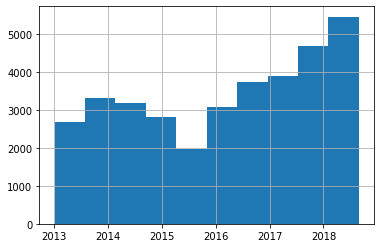

In [37]:
%matplotlib inline

corona["Date_Create"].hist()

In [38]:
pd.to_numeric(corona["Date_Create"])/10000000000000000

0        139.807948
1        141.901086
2        136.696969
3        150.107138
4        146.522735
            ...    
34851    149.613600
34852    141.486723
34853    140.440049
34854    149.320781
34855    149.010299
Name: Date_Create, Length: 34856, dtype: float64

Приклади інших перетворень датачасу у пандасі у числові змінні:

In [39]:
pd.concat([corona["Date_Create"].dt.weekday, corona["Date_Create"].dt.week], axis=1)

,Date_Create,Date_Create
0,0,17
1,4,51
2,4,17
3,2,30
4,0,23
...,...,...
34851,1,22
34852,5,44
34853,3,27
34854,2,17


In [40]:
df_date = pd.concat([corona["Date_Create"].dt.is_leap_year.astype('int'),
                     corona["Date_Create"].dt.week, 
                     corona["Date_Create"].dt.year,
                     corona["Date_Create"].dt.weekday,
                     corona["Date_Create"].dt.dayofyear,
                     corona["Date_Create"].dt.hour,
                     corona["Date_Create"].dt.minute,
                     corona["Date_Create"].dt.second,
                     corona["Date_Create"].dt.day,
                     corona["Date_Create"].dt.quarter,
                     corona["Date_Create"].dt.is_month_end.astype('int'),
                    pd.to_numeric(corona["Date_Create"])/10000000000000],
                    axis = 1)

df_date.columns = ['leap_year','weekofyear','year','weekday','dayofyear','hour','minute','second',
                   'dayofmonth','quarter','last_day_of_month', 'time_from_unix']

#flat['Date_Create'].values, flat['Date_Create'].values

df_date

,leap_year,weekofyear,year,weekday,dayofyear,hour,minute,second,dayofmonth,quarter,last_day_of_month,time_from_unix
0,0,17,2014,0,111,11,24,39,21,2,0,139807.947977
1,0,51,2014,4,353,17,41,3,19,4,0,141901.086379
2,0,17,2013,4,116,9,48,5,26,2,0,136696.968531
3,0,30,2017,2,207,12,16,17,26,3,0,150107.137738
4,1,23,2016,0,158,15,35,46,6,2,0,146522.734647
...,...,...,...,...,...,...,...,...,...,...,...,...
34851,0,22,2017,1,150,9,19,57,30,2,0,149613.599709
34852,0,44,2014,5,305,18,40,29,1,4,0,141486.722993
34853,0,27,2014,3,184,15,14,49,3,3,0,140440.048916
34854,0,17,2017,2,116,11,56,53,26,2,0,149320.781300


In [41]:
corona = pd.concat([corona, df_date], axis=1)
corona.drop(columns=['Date_Create'], inplace=True)

corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34855
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cart_Number                   34856 non-null  int64  
 1   Rooms_Number                  34856 non-null  int64  
 2   Object_Type                   34856 non-null  float64
 3   Object_Type_ID                34856 non-null  int64  
 4   Settlement                    34856 non-null  float64
 5   Settlement_ID                 34856 non-null  int64  
 6   District_Id                   34856 non-null  int64  
 7   Street                        34856 non-null  float64
 8   Street_Id                     34856 non-null  int64  
 9   House_Number                  34856 non-null  float64
 10  Metro                         34856 non-null  float64
 11  Metro_ID                      34856 non-null  int64  
 12  Metro_m                       34856 non-null  int64  
 13  F

# Імпутація пропусків в Python.

Проблемне питання: в чому сенс заповнення пропущених значень у даних? 
Які наслідки це може мати?

Якщо метод не вимагає відстуності пропусків, то можна цього не робити.
Якщо вимагає, то треба діяти.

Якщо пропусків у змінній забагато, наприклад, більше половини всіх значень, то простіше і краще просто вбити змінну.
Ще одне легке рішення - замінити все на інше значення 0, -999 чи середнє, однак це краще робити осмислено.

Найкращі рішення - заміняти на середні значення по групах.
Чи зробити модель, яка передбачає значення цієї змінної і пропуски заміти такими передбаченнями.

![](joda.jpeg)

In [42]:
corona.isnull().mean().sort_values(ascending = False).reset_index()

,index,0
0,time_from_unix,0.0
1,Clozet_В доме,0.0
2,Value_m,0.0
3,Balcon_Num,0.0
4,Sost,0.0
...,...,...
80,District_Колыванский,0.0
81,District_Коченёвский,0.0
82,District_Ленинский,0.0
83,District_Маслянинский,0.0


In [43]:
corona.fillna(-999, inplace=True)

corona = corona.fillna(-999)

In [45]:
corona.median()

Cart_Number          2.005708e+07
Rooms_Number         2.000000e+00
Object_Type          2.737866e+06
Object_Type_ID       3.000000e+00
Settlement           2.556398e+06
                         ...     
second               2.900000e+01
dayofmonth           1.700000e+01
quarter              3.000000e+00
last_day_of_month    0.000000e+00
time_from_unix       1.464715e+05
Length: 85, dtype: float64

In [46]:
corona.fillna(corona.mean(), inplace=True)

corona.isnull().mean().sort_values(ascending = False).reset_index()

,index,0
0,time_from_unix,0.0
1,Clozet_В доме,0.0
2,Value_m,0.0
3,Balcon_Num,0.0
4,Sost,0.0
...,...,...
80,District_Колыванский,0.0
81,District_Коченёвский,0.0
82,District_Ленинский,0.0
83,District_Маслянинский,0.0


In [47]:
from sklearn.impute import SimpleImputer

In [ ]:
?SimpleImputer

In [48]:
imp = SimpleImputer(missing_values=0, strategy='mean')

imp

SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=0,
              strategy='mean', verbose=0)

In [50]:
imp.fit(corona.loc[:,["lat"]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=0,
              strategy='mean', verbose=0)

In [51]:
imp.transform(corona.loc[:,["lat"]])

array([[54.9371],
       [55.0434],
       [55.0405],
       ...,
       [55.0393],
       [54.9935],
       [55.0043]])

In [52]:
imp.fit_transform(corona.loc[:,["lat"]])

array([[54.9371],
       [55.0434],
       [55.0405],
       ...,
       [55.0393],
       [54.9935],
       [55.0043]])

In [53]:
imp = SimpleImputer(missing_values=0, strategy='mean')
imp.fit(corona.loc[:10000,["lat"]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=0,
              strategy='mean', verbose=0)

In [54]:
imp.transform(corona.loc[10000:,["lat"]])

array([[55.0206],
       [55.0184],
       [55.0244],
       ...,
       [55.0393],
       [54.9935],
       [55.0043]])

# Усунення лінійного зв'язку.

В чому сенс такої операції для нас?

Щоб не було дублювання інформації.

Якщо одна змінна пояснює іншу, наприклад, на 70%, то цінність цьої іншої змінної не така висока.
Але можна це лінійний зв'язок усунути через рівняння лінійної регресії.

При цьому ми заміняємо значення нашої змінною на різницю цього значення і прогноз модулі (його остатки).

In [55]:
corona.corr()

,Cart_Number,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_abs,Value_m,Balcon_Num,Sost,Sost_ID,Clozet_ID,lat,Long,Clozet_Без ванны,Clozet_В доме,Clozet_Душ,Clozet_На улице,Clozet_На этаже,Clozet_Несколько (2 и более),Clozet_Общий,Clozet_Раздельный,Clozet_Сидячая ванна,Clozet_Совмещенный,Clozet_нет,...,Wall_Панель,Wall_Сэндвич-панель,Wall_Шлакоблок,District_Бердск,District_Болотнинский,District_Дзержинский,District_Железнодорожный,District_Заельцовский,District_Искитимский,District_Калининский,District_Каргатский,District_Кировский,District_Колыванский,District_Коченёвский,District_Ленинский,District_Маслянинский,District_Мошковский,District_Новосибирский,District_Октябрьский,District_Ордынский,District_Первомайский,District_Советский,District_Сузунский,District_Тогучинский,District_Центральный,District_Черепановский,District_Чулымский,0,leap_year,weekofyear,year,weekday,dayofyear,hour,minute,second,dayofmonth,quarter,last_day_of_month,time_from_unix
Cart_Number,1.000000,-0.034651,0.016336,-0.005297,0.121604,-0.098946,-0.112304,0.018307,0.004076,0.058853,-0.050583,0.088081,-0.058514,0.051407,0.038516,0.015227,0.029702,0.035645,-0.016646,-0.026015,0.014593,-0.035533,-0.041454,-0.004829,0.000735,0.027905,0.003692,0.010332,0.000361,0.000896,-0.011948,-0.009082,-0.013699,-0.012705,-0.026533,0.000195,0.013357,-0.004646,-0.001520,0.002445,...,0.024244,-0.003894,0.010658,-0.077782,-0.005577,-0.112431,-0.079295,0.086454,-0.049239,-0.117859,-0.004110,0.057063,-0.016837,-0.025825,0.244113,-0.003999,-0.052894,-0.084277,0.146595,-0.014068,-0.115661,-0.087243,-0.003788,-0.012571,-0.094390,-0.013166,-0.003787,0.021291,0.032791,-0.023556,0.352503,0.005672,-0.022455,-0.005038,0.009434,0.009603,0.008983,-0.024557,0.030047,0.353288
Rooms_Number,-0.034651,1.000000,-0.005974,-0.012796,-0.003107,0.001207,-0.007983,0.191881,-0.135709,0.048747,0.096499,-0.026884,-0.041271,0.450218,-0.196915,-0.104857,-0.159703,-0.045515,0.580070,0.637178,0.266419,0.544011,-0.214590,0.148130,-0.013289,-0.067576,0.185239,0.002932,-0.005496,-0.000635,0.020300,-0.012232,0.004175,-0.013443,0.187834,-0.027077,0.468982,-0.014050,-0.484256,-0.006975,...,0.131884,0.001564,-0.002898,-0.003806,0.002211,0.026283,0.066154,0.024307,-0.005174,0.002474,-0.004932,-0.069054,-0.002553,0.012384,0.022012,-0.004932,-0.014109,0.006982,-0.004971,0.012768,-0.115714,0.045122,0.008059,-0.001218,0.049318,0.007293,0.008059,-0.119240,-0.021103,-0.022995,-0.016188,0.006758,-0.023846,-0.019705,-0.000818,-0.000410,0.004692,-0.027552,-0.021996,-0.020317
Object_Type,0.016336,-0.005974,1.000000,0.167369,0.136333,-0.084340,-0.036002,0.124727,0.143666,-0.034526,0.066321,0.138174,0.028106,-0.048288,0.206291,0.364380,0.548541,0.056694,0.147029,0.031122,0.217825,0.261519,0.168964,-0.182916,0.187987,0.145368,0.029562,0.002613,0.007044,-0.055489,-0.041442,-0.022539,-0.047792,-0.012605,0.097737,-0.010861,0.152147,-0.039555,-0.179125,0.003597,...,-0.085810,0.003834,-0.100222,-0.031678,-0.008958,-0.086798,-0.004445,-0.035362,-0.044589,-0.010887,0.005905,0.005082,-0.003267,-0.036573,-0.029761,0.005905,-0.038923,-0.034629,0.133430,-0.016002,0.102288,-0.049244,0.003834,-0.013652,0.022479,-0.011320,-0.016502,0.678880,-0.012023,0.012980,0.050624,0.011436,0.013436,-0.007579,-0.003273,-0.003822,-0.003270,0.011900,-0.002231,0.053479
Object_Type_ID,-0.005297,-0.012796,0.167369,1.000000,-0.046384,0.059185,0.066925,0.002401,0.076947,-0.026207,-0.012184,-0.039278,0.008008,-0.013984,0.067466,0.053922,0.068233,0.047597,0.034367,0.016505,0.046880,0.051038,-0.001491,-0.089057,0.044565,0.065206,-0.004605,-0.006408,-0.005939,0.031776,0.033425,0.014979,0.058122,0.049720,0.066458,-0.001538,0.008080,0.006575,-0.041588,0.012842,...,-0.131732,0.000045,0.066173,0.004518,0.003995,-0.029153,-0.017693,-0.016384,0.012910,-0.024830,0.033408,-0.007827,0.009366,0.036867,

In [56]:
corona.corr()[np.abs(corona.corr())>0.3]

,Cart_Number,Rooms_Number,Object_Type,Object_Type_ID,Settlement,Settlement_ID,District_Id,Street,Street_Id,House_Number,Metro,Metro_ID,Metro_m,Flats_Plan,Flats_Plan_ID,Stor,Storeys,Wall_ID,Space_Total,Space_Living,Space_Kitchen,Value_abs,Value_m,Balcon_Num,Sost,Sost_ID,Clozet_ID,lat,Long,Clozet_Без ванны,Clozet_В доме,Clozet_Душ,Clozet_На улице,Clozet_На этаже,Clozet_Несколько (2 и более),Clozet_Общий,Clozet_Раздельный,Clozet_Сидячая ванна,Clozet_Совмещенный,Clozet_нет,...,Wall_Панель,Wall_Сэндвич-панель,Wall_Шлакоблок,District_Бердск,District_Болотнинский,District_Дзержинский,District_Железнодорожный,District_Заельцовский,District_Искитимский,District_Калининский,District_Каргатский,District_Кировский,District_Колыванский,District_Коченёвский,District_Ленинский,District_Маслянинский,District_Мошковский,District_Новосибирский,District_Октябрьский,District_Ордынский,District_Первомайский,District_Советский,District_Сузунский,District_Тогучинский,District_Центральный,District_Черепановский,District_Чулымский,0,leap_year,weekofyear,year,weekday,dayofyear,hour,minute,second,dayofmonth,quarter,last_day_of_month,time_from_unix
Cart_Number,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.352503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.353288
Rooms_Number,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450218,NaN,NaN,NaN,NaN,0.58007,0.637178,NaN,0.544011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468982,NaN,-0.484256,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Object_Type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36438,0.548541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Object_Type_ID,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Settlement,NaN,NaN,NaN,NaN,1.0,-0.643207,-0.70798,NaN,NaN,NaN,NaN,0.470005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.321186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.391231,NaN,NaN,NaN,NaN,-0.468278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.378938,-0.335737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
dayofmonth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.323388,NaN
quarter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

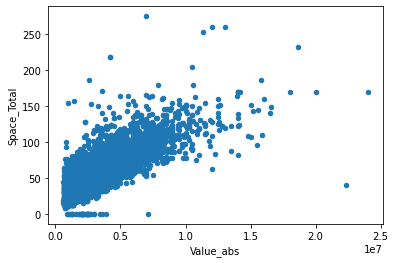

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt

corona.loc[corona['Space_Total'] < 500, :].plot.scatter('Value_abs', 'Space_Total')

In [60]:
corona.loc[:, ['Value_abs', 'Space_Total']].corr()

,Value_abs,Space_Total
Value_abs,1.000000,0.573781
Space_Total,0.573781,1.000000


In [61]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression(normalize=True, n_jobs=-1)

In [78]:
x = corona.loc[corona['Space_Total'] < 500, :].Space_Total.values.reshape(-1, 1) #[flat.lat.values!=0]
y = corona.loc[corona['Space_Total'] < 500, :].Value_abs.values.reshape(-1, 1) #[flat.lat.values!=0] [flat.lat.values!=0]

In [79]:
y

array([[1340000],
       [3250000],
       [2150000],
       ...,
       [4250000],
       [4500000],
       [3100000]])

In [80]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [67]:
lr.intercept_[0] + x*lr.coef_[0][0]

array([[1831559.78361017],
       [2419928.91798026],
       [2056106.45807991],
       ...,
       [2911657.71143931],
       [3124834.93403717],
       [3480130.3050336 ]])

In [68]:
lr.predict(x)

array([[1831559.78361017],
       [2419928.91798026],
       [2056106.45807991],
       ...,
       [2911657.71143931],
       [3124834.93403717],
       [3480130.3050336 ]])

In [71]:
print('Coefficients: ', round(lr.coef_[0][0],5), 'Bias:', lr.intercept_[0])

Coefficients:  28423.62968 Bias: 1206239.9306564487


In [ ]:
"(lr.intercept_[0] + x*lr.coef_[0][0]) - y

array([[-0.20086786],
       [-0.3045678 ],
       [-0.34646717],
       ...,
       [ 7.15227903],
       [16.93319773],
       [16.93319773]])

In [72]:
corona['resid_value_abs'] = lr.predict(x)-y

In [81]:
corona.loc[:, ['Value_abs', 'Space_Total', 'resid_value_abs']].corr()

,Value_abs,Space_Total,resid_value_abs
Value_abs,1.000000,5.737814e-01,-8.190085e-01
Space_Total,0.573781,1.000000e+00,-1.391283e-16
resid_value_abs,-0.819008,-1.391283e-16,1.000000e+00


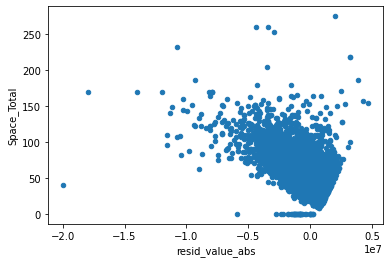

In [82]:
corona.loc[corona['Space_Total'] < 500, :].plot.scatter('resid_value_abs', 'Space_Total')

In [83]:
pred = lr.predict(x)

from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y, pred))

print('Variance score: %.2f' % r2_score(y, pred))


Mean squared error: 598500628740.40
Variance score: 0.62


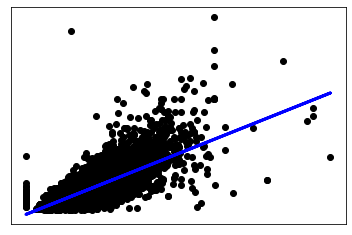

In [84]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(x, y,  color='black')
plt.plot(x, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

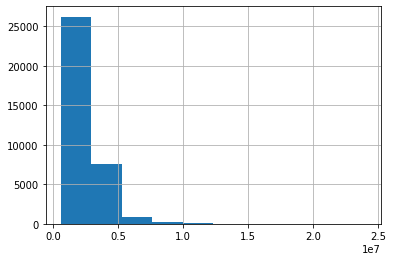

In [86]:
corona.loc[corona['Space_Total'] < 500, :].Value_abs.hist() #[flat.lat.values!=0]

In [ ]:
y-pred, x

(array([[  0.20086786],
        [  0.3045678 ],
        [  0.34646717],
        ...,
        [ -7.15227903],
        [-16.93319773],
        [-16.93319773]]), array([[117.7166  ],
        [117.3319  ],
        [117.224844],
        ...,
        [ 78.02    ],
        [ 78.475   ],
        [ 78.475   ]]))

#  Боротьба з мультиколінеарністю.

Вище було описано один із способів боротьби з мультуколінеарністю. Зазвичай з нею борються через видалення однієї змінної із пари корелюючих між собою змінних.

![text](multicollinearity.jpg)

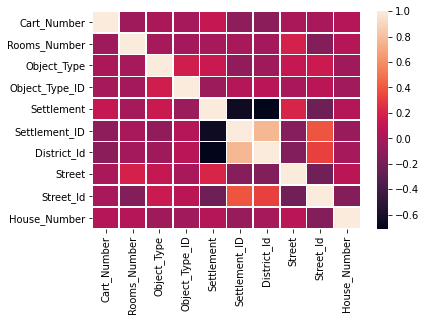

In [90]:
import seaborn as sns

corr = corona.iloc[:, :10].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,  linewidths=.5)

# Формування вибірки.

Які є правила формування вибірок?

Нам потрібно для наших задач розділяти вибірку на на навчальний і текстовий датасет.

Через навчальний датасет ми будемо аналізувати, наскільки якісна модель у нас вийшла.

![](sample.jpg)

In [94]:
corona.shape, corona.sample(axis=0, frac = 0.43).shape

((34856, 86), (14988, 86))

In [99]:
pd.concat([corona.sample(1000).iloc[:,[0]].reset_index(drop=True),
           corona.sample(1000).iloc[:,[0]].reset_index(drop=True)],axis=1)

,Cart_Number,Cart_Number
0,30058808,10014811
1,10015933,10046480
2,20331009,20016028
3,10152969,10068920
4,30092463,30015346
...,...,...
995,30033065,30067249
996,200510929,20102711
997,30064466,20079307
998,10089928,20076149


In [101]:
pd.concat([corona.sample(1000, random_state=66).iloc[:,[0]].reset_index(drop=True),
           corona.sample(1000, random_state=66).iloc[:,[0]].reset_index(drop=True)],axis=1)

,Cart_Number,Cart_Number
0,20043289,20043289
1,30055186,30055186
2,30081809,30081809
3,20082814,20082814
4,10069716,10069716
...,...,...
995,200713495,200713495
996,20094040,20094040
997,20334252,20334252
998,100613029,100613029


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(corona.iloc[:,[0,2,3,4,5,6,7,8,9,10]], 
                                                    corona.loc[:,['Value_m']],
                                                    test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27884, 10), (6972, 10), (27884, 1), (6972, 1))

Як би вирозділили масив у таких випадках:
    
- у нас масив має 10000 спостережень (пропорція 20х80)
- у нас масив має 100500100500 спостережень (пропорція 1х99)
- наша задача - робити прогноз у часі (найбільш актуальний часовий період (наприклад, останній рік) кидаємо в текстовий датасет, решта періодів - у навчальний)

## Забeзпечення відтворюваності рандомного.

Для чого це нам?

Це для відтворюваності результату. Інодія якість моделі може залежати і від випадковостей, щоб цей ефект при тестуванні параметрів було усунено - треба випадковість зробити псевдовипадковістю. 

![](random.gif)

In [ ]:
pd.concat([corona.sample(1000, random_state=1).iloc[:,[0]].reset_index(drop=True),
           corona.sample(1000, random_state=1).iloc[:,[0]].reset_index(drop=True)],axis=1)

,age,age
0,NaN,NaN
1,28,28
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
995,NaN,NaN
996,NaN,NaN
997,NaN,NaN
998,NaN,NaN


In [ ]:
import random

random.seed(5)

random.randint(5, 9)

9

In [ ]:
corona.head()

,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,age_na,resid_lat
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,male,"Chaohu City, Hefei City",Anhui,China,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,0.821429,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,False,-0.200868
2,47,male,"Baohe District, Hefei City",Anhui,China,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,0.821429,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,False,-0.304568
3,49,male,"High-Tech Zone, Hefei City",Anhui,China,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,0.821429,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,False,-0.346467
4,47,female,"High-Tech Zone, Hefei City",Anhui,China,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,0.821429,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,False,-0.346467
5,50,female,"Feidong County, Hefei City",Anhui,China,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",0.821429,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,False,-0.544341


# Максимізація нормальності



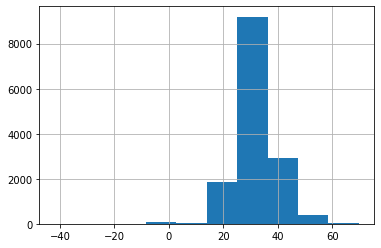

In [ ]:
corona['latitude'].hist()

In [ ]:
corona['latitude'].skew(), corona['latitude'].kurtosis()#,flat['Space_Total_standard'].skew(), flat['Space_Total_standard'].kurtosis()

(-0.9306334502150925, 8.89905615764335)

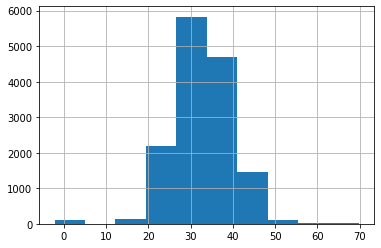

In [ ]:
corona.loc[corona['latitude'] > -20,'latitude'].hist()

In [ ]:
corona.loc[corona['latitude'] > -20,'latitude'].skew(), corona.loc[corona['latitude'] > -20,'latitude'].kurtosis()

(-0.10726137229493755, 2.510718566423353)

(-0.339814919797436, 3.510247175429413)

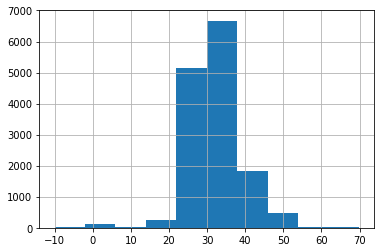

In [ ]:
corona.loc[corona['latitude'] < -10,'latitude'] = -10
corona['latitude'].hist()
corona['latitude'].skew(), corona['latitude'].kurtosis()

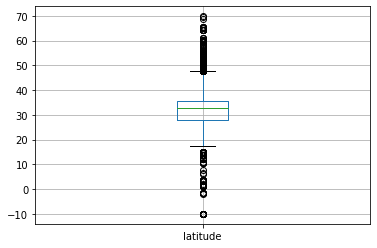

In [ ]:
corona.boxplot('latitude')

In [ ]:
np.log(corona['latitude']).skew(), np.log1p(corona['latitude']).skew(), np.exp(corona['latitude']).skew(), np.sqrt(corona['latitude']).skew(), (corona['latitude']**1.05).skew()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-5.610051208978941,
 -4.666057568698148,
 80.93409573782183,
 -1.695268371155699,
 0.023974338486393458)

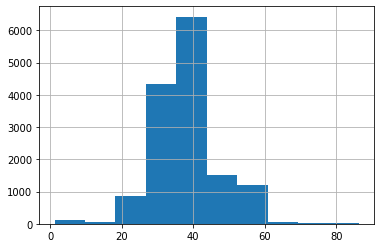

In [ ]:
(corona['latitude']**1.05).hist()

# Зробимо на закріплення невеличку модель

![](bus.jpg)

Це приклад регресії методом k-найближчих сусідів. Як думаєте, як він працює?

In [ ]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split

del flat['Value_m']

X, y = flat.iloc[:, :20], flat.Value_abs

def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        del df[each]
        df = pd.concat([df, dummies], axis=1)
    return df

X = one_hot(X, ['Object_Type', 'Settlement', 'District', 'Street', 'House_Number', 'Metro','Flats_Plan','Wall'])

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = neighbors.KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

(34856, 1952)


Давайте розрахуємо самостійно метрику кореня середньоквадратичної помилки:

$$
RMSE = \sqrt{\frac{\sum(y_i-y_p)^2}{N}}
$$

In [ ]:
def RMSE(y_test, y_pred):
    return (sum((y_test - y_pred)**2)/len(y_test))**(0.5)

In [ ]:
RMSE(y_test, y_pred)

1011541.0728215149

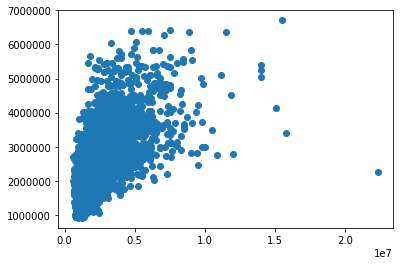

In [ ]:
plt.scatter(y_test, y_pred)

## Базовий приклад підбору гіперпараметрів

У нас іноді виникатиме необхідність підібрати найбільш вдалий параметр моделі. У методів найближчих сусідів - це одини єдиний параметр - кількість найближчих сусідів.
Через цикл перебираємо різні варіанти кількості сусідів і дивимось при якому розкладі метрика дає найкращий результат:

In [ ]:
for i in range(2,11):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train[:,:500], y_train)
    y_pred = knn.predict(X_test[:,:500])
    print(i, ":", RMSE(y_test, y_pred))

2 : 737481.999038
3 : 727370.853278
4 : 719981.244588
5 : 719886.827494
6 : 723667.524751
7 : 732019.137543
8 : 725463.383997
9 : 730753.318566
10 : 736264.444648


Найкращий результат був при 4-х найближчих сусідах.

Тепер зробимо цю модель не з даммі енкодінгом (0 і 1-ці), а з таргетним кодуванням:

In [ ]:
def target_encoding(df, cols):
    for i in cols:
        df[i] = pd.merge(df.groupby(df[i], as_index=False).agg({i: np.mean}), 
             df, how="right", on='Object_Type')[i].values
    return df

In [ ]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split

#del flat['Value_m']

X = flat.loc[:,['Cart_Number', 'Rooms_Number', 'Object_Type', 'Object_Type_ID',
       'Settlement', 'Settlement_ID', 'District', 'District_Id', 'Street',
       'Street_Id', 'House_Number', 'Metro', 'Metro_ID', 'Metro_m',
       'Flats_Plan', 'Flats_Plan_ID', 'Stor', 'Storeys', 'Wall', 'Wall_ID',
       'Space_Total', 'Space_Living', 'Space_Kitchen', 'Value_abs',
       'Balcon_Num', 'Sost', 'Sost_ID', 'Clozet', 'Clozet_ID', 'lat', 'Long']] 

y = flat.Value_abs

def target_encoding(df, cols, target):
    for i in cols:
        a = df.groupby(df[i], as_index=False)[target].agg(np.mean)
        if a.shape[1] == 1:
            a = df.groupby(df[i], as_index=False)[target].agg(np.mean)
        b = df.loc[:,[i]]
        #print(a)
        c = pd.merge(a, b, how="right", on=i)
        df[i] = c[target].values
    return df

X = target_encoding(X,  ['Object_Type', 'Settlement', 'District', 'Metro', 'Flats_Plan','Wall','Sost','Clozet'], 'Value_abs')

X = X.loc[:,['Cart_Number', 'Rooms_Number', 'Object_Type', 'Object_Type_ID',
       'Settlement', 'Settlement_ID', 'District', 'District_Id', 
       'Street_Id', 'Metro', 'Metro_ID', 'Metro_m',
       'Flats_Plan', 'Flats_Plan_ID', 'Stor', 'Storeys', 'Wall', 'Wall_ID','Space_Total', 
            'Space_Living', 'Space_Kitchen', 'Balcon_Num', 'Sost', 'Sost_ID', 'Clozet', 'Clozet_ID', 'lat', 'Long']]

X = X.fillna(X.mean())

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = neighbors.KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
#
y_pred = knn.predict(X_test)

(34856, 28)


In [ ]:
RMSE(y_test, y_pred)

781914.3891927302

In [ ]:
for i in range(2,11):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(i, ":", RMSE(y_test, y_pred))

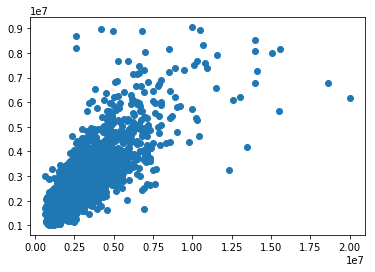

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

При тагретному кодуванні результат вийшов кращим, оптимальна кількість найближчих сусідів - 7.